In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Generate synthetic data
def generate_data(n_samples=300, n_clusters=4, cluster_std=0.5, random_state=42):
    np.random.seed(random_state)
    centers = np.random.uniform(-10, 10, (n_clusters, 2))
    data = []
    for center in centers:
        cluster_data = np.random.normal(loc=center, scale=cluster_std, size=(n_samples // n_clusters, 2))
        data.append(cluster_data)
    return np.vstack(data)

In [3]:
# Step 2: Helper function to calculate Euclidean distance

#write your code here 
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [4]:
# Step 3: Find neighbors of a point
def find_neighbors(data, point_idx, eps):
    neighbors = []
    #write your here 
    for x in range(len(data)):
        if euclidean_distance(data[x], data[point_idx]) < eps:
            neighbors.append(x)

    #end your code here 
    return neighbors

In [5]:

# Step 4: Expand cluster based on neighbors
def expand_cluster(data, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = find_neighbors(data, point_idx, eps)
    
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # Mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
                
            elif labels[neighbor_idx] == 0:
                labels[neighbor_idx] = cluster_id
                new_neighbors = find_neighbors(data, neighbor_idx, eps)
                if len(new_neighbors) >= min_samples:
                    neighbors.extend(new_neighbors)
                    
            i += 1
        return True

In [6]:

# Step 5: DBSCAN algorithm
def dbscan(data, eps, min_samples):
    #write your here 
    
    labels = np.zeros(data.shape[0], dtype = int)
    cluster_id = 0
    
    while True:
        unvisited = np.where(labels == 0)[0]
        if len(unvisited) == 0:
            break
            
        point = unvisited[0]
        if expand_cluster(data, labels, point, cluster_id + 1, eps, min_samples):
            cluster_id += 1
        
    #end your code here 
            
    return labels

In [7]:
# Step 6: Generate data and apply DBSCAN
data = generate_data()
eps = 1.0
min_samples = 5
labels = dbscan(data, eps, min_samples)

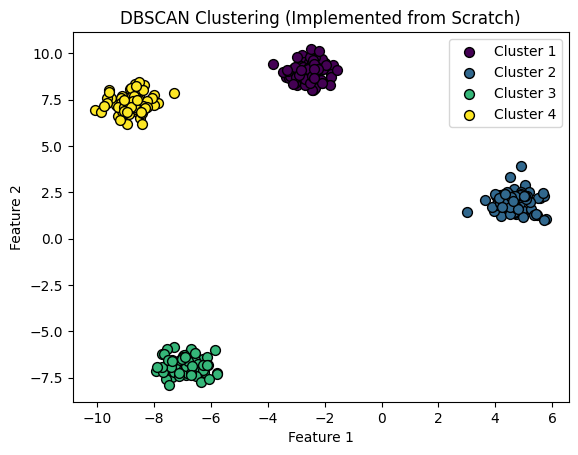

In [8]:

# Step 7: Visualize the clustered data
def visualize_clusters(data, labels):
    unique_labels = set(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black color for noise
            col = [0, 0, 0, 1]
        class_member_mask = (np.array(labels) == k)
        xy = data[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=50, edgecolors='k', label=f"Cluster {k}" if k != -1 else "Noise")

    plt.title("DBSCAN Clustering (Implemented from Scratch)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Visualize the results
visualize_clusters(data, labels)


In [9]:
# Repeat the same above algorithm with using Manhattan distance   

In [10]:
def manhattan_distance(p1, p2):
    return (abs(p1[0] - p2[0]) + abs(p1[1] - p2[1]))

def find_manhattan_neighbors(data, point_idx, eps):
    neighbors = []
    
    for x in range(len(data)):
        if manhattan_distance(data[x], data[point_idx]) < eps:
            neighbors.append(x)

    return neighbors


def expand_manhattan_cluster(data, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = find_manhattan_neighbors(data, point_idx, eps)
    
    if len(neighbors) < min_samples:
        labels[point_idx] = -1 
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
                
            elif labels[neighbor_idx] == 0:
                labels[neighbor_idx] = cluster_id
                new_neighbors = find_manhattan_neighbors(data, neighbor_idx, eps)
                if len(new_neighbors) >= min_samples:
                    neighbors.extend(new_neighbors)
                    
            i += 1
        return True

def dbscan_manhattan(data, eps, min_samples):
    
    labels = np.zeros(data.shape[0], dtype = int)
    cluster_id = 0
    
    while True:
        unvisited = np.where(labels == 0)[0]
        if len(unvisited) == 0:
            break
            
        point = unvisited[0]
        if expand_manhattan_cluster(data, labels, point, cluster_id + 1, eps, min_samples):
            cluster_id += 1 
            
    return labels

In [11]:
data = generate_data()
eps = 1.0
min_samples = 5
manhattan_labels = dbscan_manhattan(data, eps, min_samples)

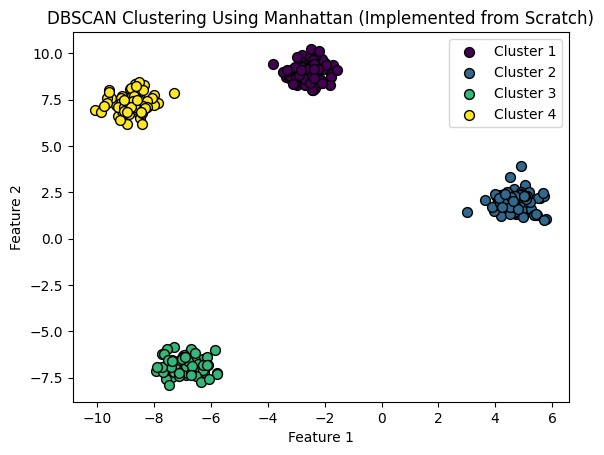

In [12]:

# Step 7: Visualize the clustered data
def visualize_clusters(data, labels):
    unique_labels = set(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black color for noise
            col = [0, 0, 0, 1]
        class_member_mask = (np.array(labels) == k)
        xy = data[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=50, edgecolors='k', label=f"Cluster {k}" if k != -1 else "Noise")

    plt.title("DBSCAN Clustering Using Manhattan (Implemented from Scratch)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Visualize the results
visualize_clusters(data, manhattan_labels)
